In [298]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [299]:
dataset = 'HousingData.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(dataset, delimiter=',', names=column_names, header=0)

In [300]:
# Data Information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [301]:
# Show the first 10 rows
print(df.head(10))

      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.6

In [302]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [303]:
# Examine the missing data
df[df['CRIM'].isnull()]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
53,NaN,21.0,5.64,0.0,0.439,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
115,NaN,0.0,10.01,0.0,0.547,5.928,88.2,2.4631,6,432,17.8,344.91,15.76,18.3
183,NaN,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3,193,17.8,396.90,5.68,32.5
191,NaN,45.0,3.44,0.0,0.437,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87,36.4
196,NaN,80.0,1.52,0.0,0.404,7.287,34.1,7.3090,2,329,12.6,396.90,4.08,33.3
229,NaN,0.0,6.20,0.0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5
236,NaN,0.0,6.20,1.0,0.507,6.631,76.5,4.1480,8,307,17.4,388.45,9.54,25.1
241,NaN,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6,300,16.6,394.62,12.40,20.1
262,NaN,20.0,3.97,0.0,0.647,8.398,91.5,2.2885,5,264,13.0,386.86,5.91,48.8


In [304]:
# Now fill missing values with the mean
df.fillna(df.mean(), inplace=True)

# Check if there are still any missing values
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


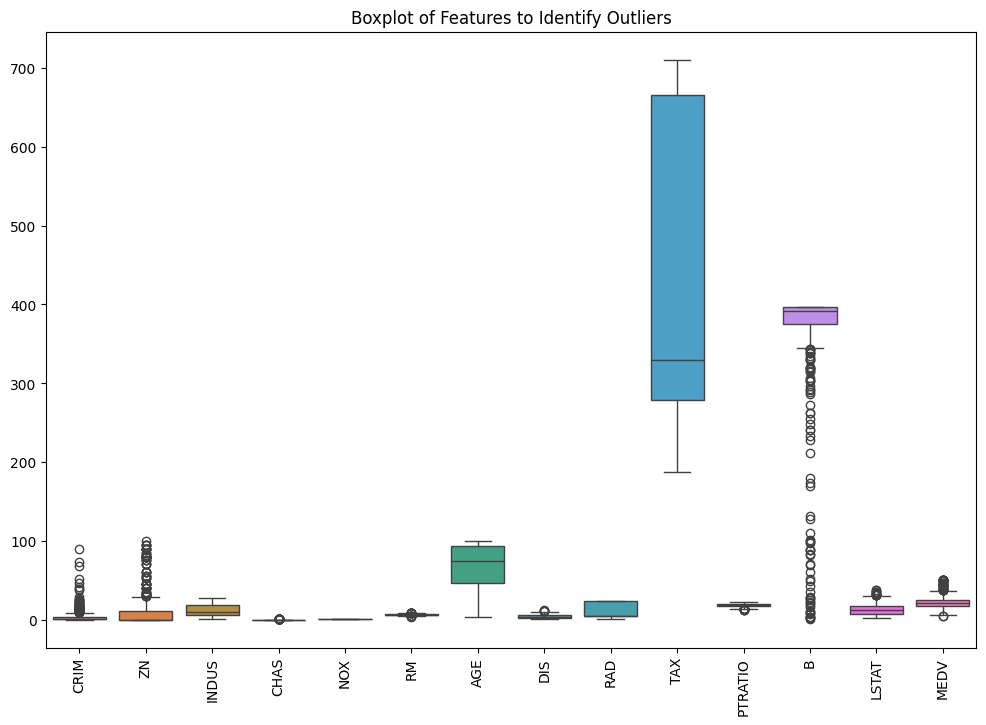

In [305]:
# Check for outliers using boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot of Features to Identify Outliers')
plt.show()


In [306]:
# Remove outliers using IQR (Interquartile Range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


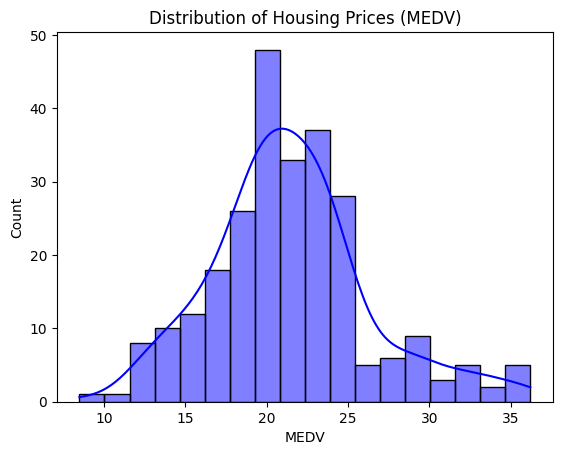

In [307]:
# Visualize the cleaned dataset's distribution of `MEDV` (housing price)
sns.histplot(df_clean['MEDV'], kde=True, color='blue')
plt.title('Distribution of Housing Prices (MEDV)')
plt.show()

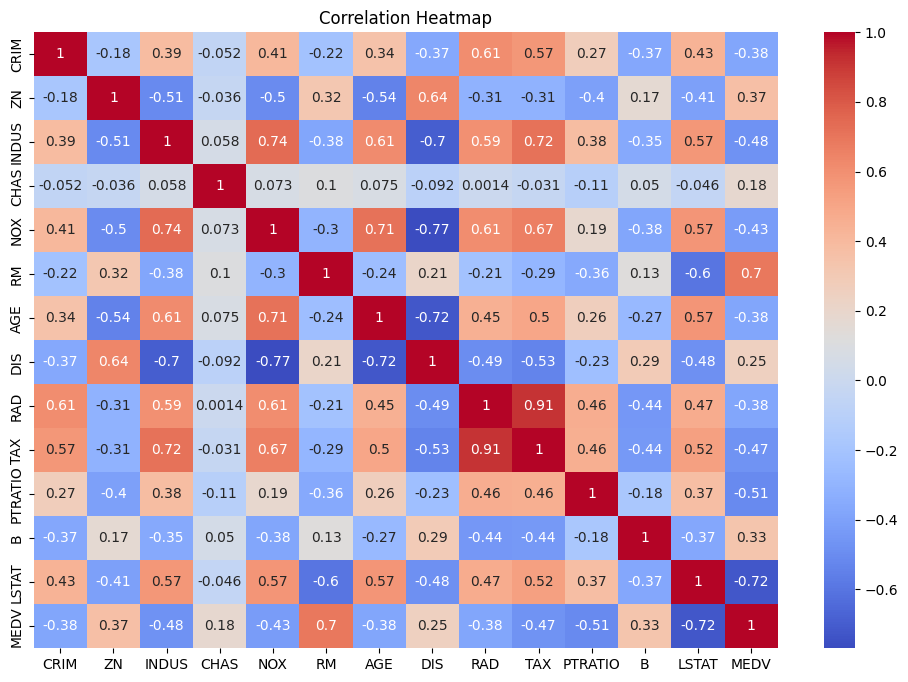

In [308]:
# Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [309]:
# The 'RAD' and 'TAX' features have a high correlation of 0.91, which can lead to multicollinearity.
# Multicollinearity occurs when two or more features are highly correlated, which can make the model 
# less interpretable and affect its performance.
# To avoid this, one of these features will be dropped. In this case, we'll drop the 'RAD' column.

df = df.drop(columns=['RAD']) 

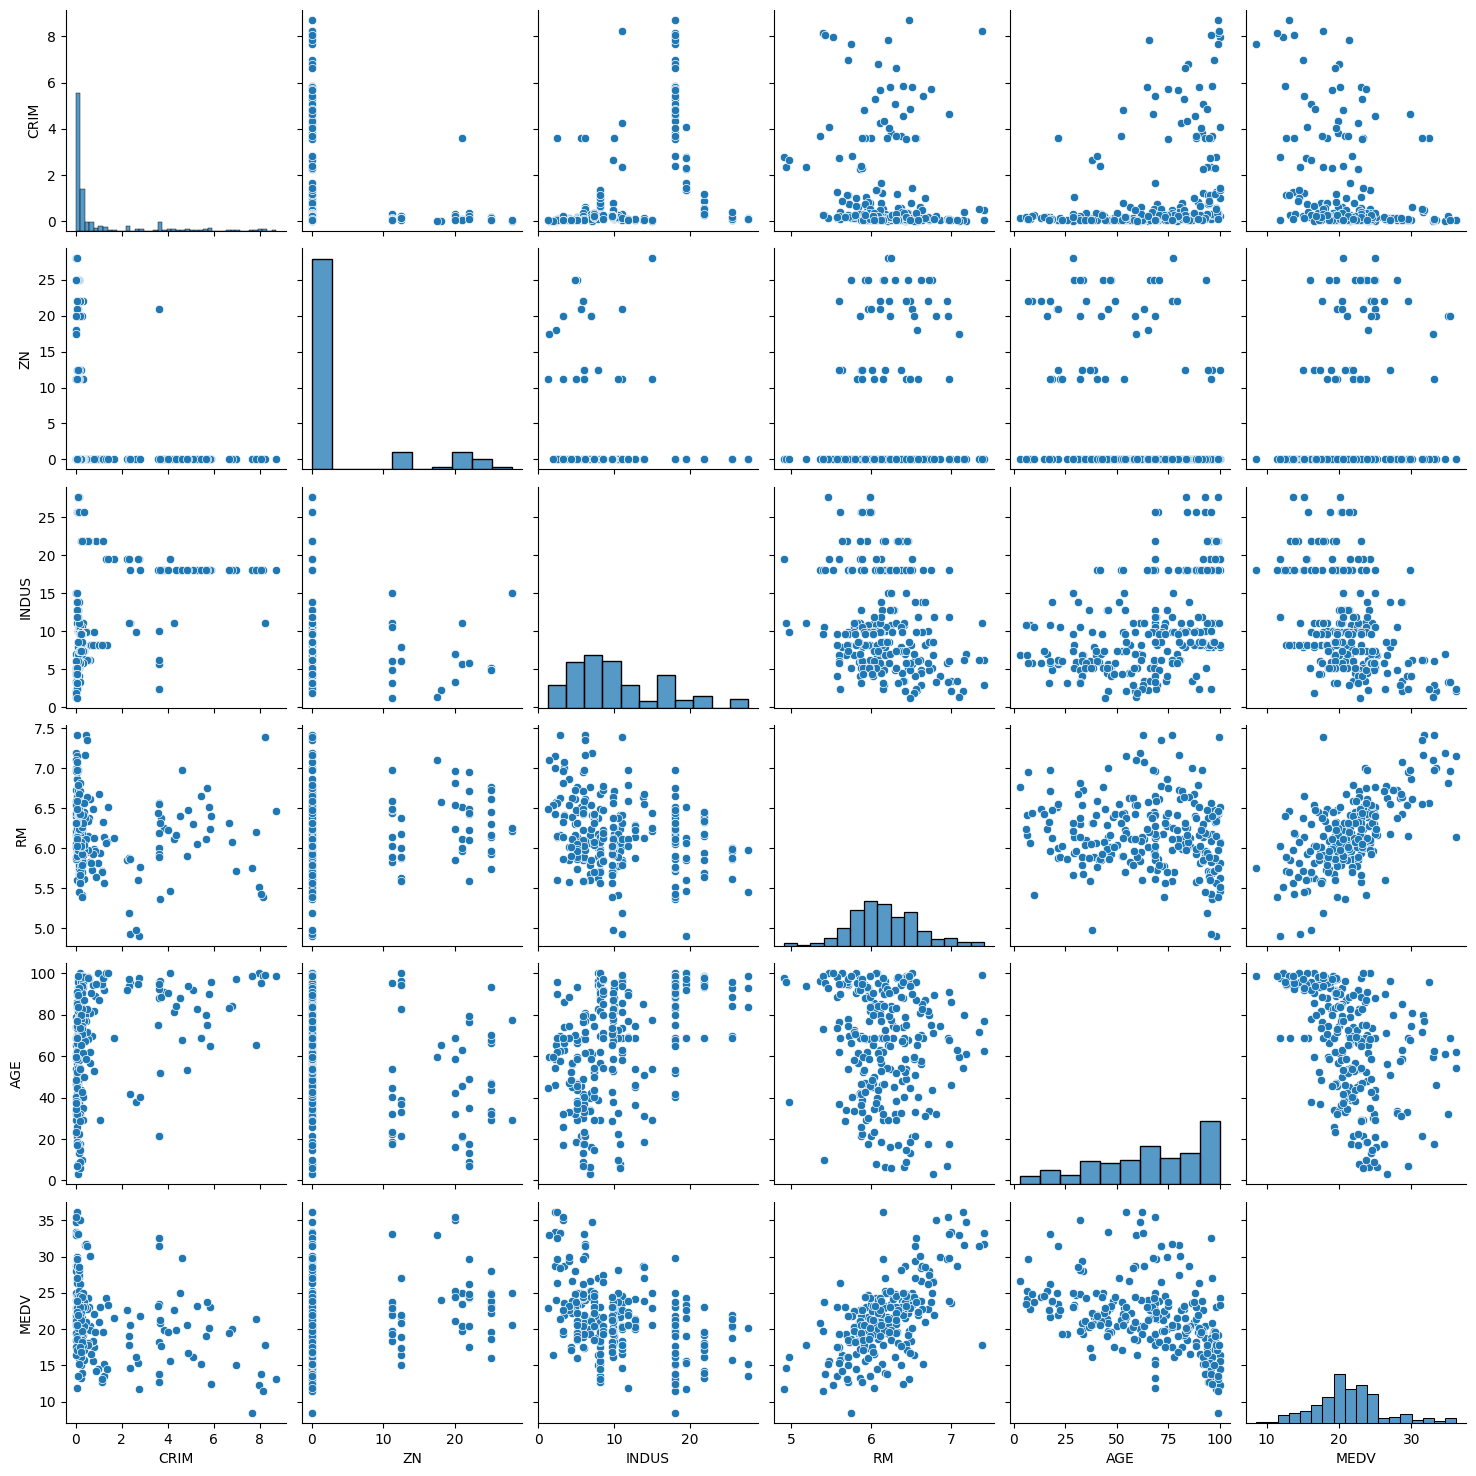

In [310]:
# Pairplot to explore relationships between features
sns.pairplot(df_clean[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'MEDV']])
plt.show()


In [311]:
# Feature Engineering (Scaling features)
X = df_clean.drop(['MEDV', 'RAD'], axis=1)  
y = df_clean['MEDV']

In [312]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

In [314]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [315]:
# Print model performance metrics
print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - Root Mean Squared Error: {rmse}')
print(f'Linear Regression - R-squared: {r2}')  

Linear Regression - Mean Squared Error: 7.0835332049113084
Linear Regression - Root Mean Squared Error: 2.661490786178173
Linear Regression - R-squared: 0.6672863248796537


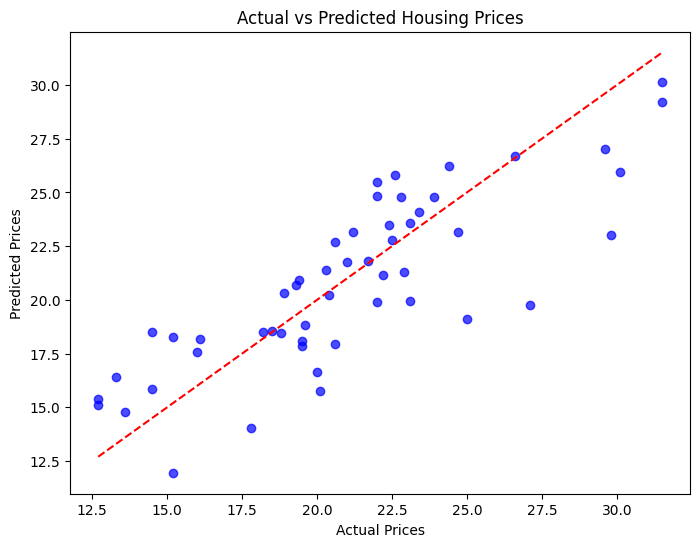

In [316]:
# Visualizing the Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

In [317]:
# Prediction using new data
new_data = pd.DataFrame({
    'CRIM': [0.03],  
    'ZN': [0],        
    'INDUS': [8.14],  
    'CHAS': [0],      
    'NOX': [0.5],    
    'RM': [6.2],     
    'AGE': [70],  
    'DIS': [4.5],    
    'RAD': [4],       
    'TAX': [300],     
    'PTRATIO': [18],  
    'B': [390],       
    'LSTAT': [12],    
})

# Display new data to confirm
print(new_data)

   CRIM  ZN  INDUS  CHAS  NOX   RM  AGE  DIS  RAD  TAX  PTRATIO    B  LSTAT
0  0.03   0   8.14     0  0.5  6.2   70  4.5    4  300       18  390     12


In [318]:
new_data = new_data.drop(columns=['RAD']) 

# Transform the new data to match the scale of the training data
new_data_scaled = scaler.transform(new_data)

# Display the scaled data to check the transformation
print(new_data_scaled)

[[-0.52299045 -0.47566365 -0.39383548  0.         -0.33916486  0.04425111
   0.19278784  0.27769983 -0.45326252 -0.46574052  0.08227166  0.04714909]]


In [319]:
# The trained model will now generate predictions for the housing prices based on the new data.
predicted_prices = model.predict(new_data_scaled)

# Display the predicted housing prices
print("The model predicts the following housing prices for the provided data: ", predicted_prices)

The model predicts the following housing prices for the provided data:  [22.08396154]
